In [1]:
%pip install --quiet gdown  # for those who don't run it on Google Colab
%pip install ydata-profiling
%pip install plotly
!gdown --fuzzy 'https://drive.google.com/file/d/1aZMVSrP3fwh_d5TPpL-IzgItefG-iNs1/view?usp=sharing'
!unzip zip_data.zip
%cd zip_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=45f7ab09ee081ef93098067e7228f11bbe953d0c7612426bd153c6631161a4e4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

# **1. Exploration**



In [2]:
import pandas as pd
import numpy as np

X_train_data = pd.read_csv("X_train.csv", delimiter=';')
y_train_data = pd.read_csv("y_train.csv", delimiter=';')
X_test_data = pd.read_csv("X_test.csv", delimiter=';')

data = {"X_train_data": X_train_data,
        "y_train_data": y_train_data,
        "X_test_data": X_test_data}

# **(a)**

In [32]:
print(f"Number of variables in the training set: {X_train_data.shape[1]}")
print(f"Number of observations in the training set: {X_train_data.shape[0]}")
print(f"Number of variables in the test set: {X_test_data.shape[1]}")
print(f"Number of observations in the test set: {X_test_data.shape[0]}")

Number of variables in the training set: 9000
Number of observations in the training set: 3794
Number of variables in the test set: 9000
Number of observations in the test set: 660


In [3]:
summary_train = pd.concat([X_train_data.dtypes, X_train_data.isnull().sum(), X_train_data.nunique()], axis=1)
summary_train.columns = ['dtype', 'missing', 'nunique']
summary_train

,dtype,missing,nunique
LINC01128,float64,0,281
KLHL17,float64,0,43
HES4,float64,0,143
ISG15,float64,0,1764
AGRN,float64,0,17
...,...,...,...
MT.ND4,float64,0,3773
MT.ND5,float64,0,3727
MT.ND6,float64,0,1798
MT.CYB,float64,0,3759


In [4]:
print(summary_train.dtype.unique())
print(summary_train.missing.unique())
# data is complete - no nulls, only floats

[dtype('float64')]
[0]


In [5]:
summary_test = pd.concat([X_test_data.dtypes, X_test_data.isnull().sum(), X_test_data.nunique()], axis=1)
summary_test.columns = ['dtype', 'missing', 'nunique']
summary_test

,dtype,missing,nunique
LINC01128,float64,0,39
KLHL17,float64,0,2
HES4,float64,0,22
ISG15,float64,0,203
AGRN,int64,0,1
...,...,...,...
MT.ND4,float64,0,427
MT.ND5,float64,0,422
MT.ND6,float64,0,190
MT.CYB,float64,0,425


In [6]:
print(summary_test.dtype.unique())
print(summary_test.missing.unique())
# data is complete - no nulls, only floats

[dtype('float64') dtype('int64')]
[0]


# (**b**)

In [7]:
y_train_data.describe()

,CD36_Y
count,3794.000000
mean,1.009130
std,1.355825
min,0.000000
25%,0.091779
50%,0.253489
75%,2.302033
max,5.104848


In [8]:
y_train_data[y_train_data['CD36_Y'] != 0].describe()

,CD36_Y
count,2978.000000
mean,1.285642
std,1.409438
min,0.046667
25%,0.178111
50%,0.398633
75%,2.901416
max,5.104848


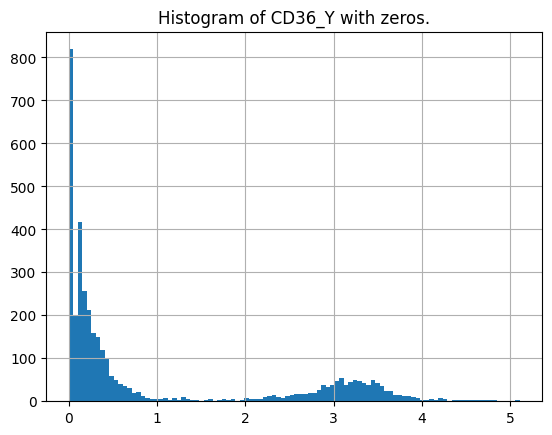

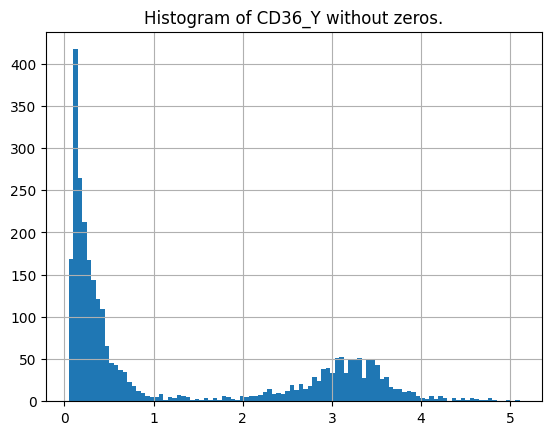

In [9]:
from matplotlib import pyplot as plt
y_train_data.hist(bins = 100)
plt.title('Histogram of CD36_Y with zeros.')
plt.show()
y_train_data[y_train_data['CD36_Y'] != 0].hist(bins = 100)
plt.title('Histogram of CD36_Y without zeros.')
plt.show()

In [10]:
print('MEDIAN:',np.median(y_train_data['CD36_Y']))
print(y_train_data[y_train_data['CD36_Y'] == 0].shape[0] / y_train_data.shape[0] * 100, '% are zeros.')
print('Median without zeros:', np.median(y_train_data[y_train_data['CD36_Y'] != 0]))


# We have two hills - they could be divided into those with high and low expression
# - it's possible, for instance, to use GMM and train it to provide two components.

MEDIAN: 0.253489166498184
21.50764364786505 % are zeros.
Median without zeros: 0.3986325711011885


In [11]:
!pip install scikit-learn

In [12]:
# GMM
import sklearn
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(y_train_data)
print('Mean of the first mode:', gm.means_[0], 'and mean of the secong mode:', gm.means_[1])

Mean of the first mode: [0.18996631] and mean of the secong mode: [3.0356015]


# (**c**)

In [13]:
correlations = X_train_data.corrwith(y_train_data['CD36_Y'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7e4e73066800>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7e4e730667a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7e4e73066dd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7e4e73067130>}

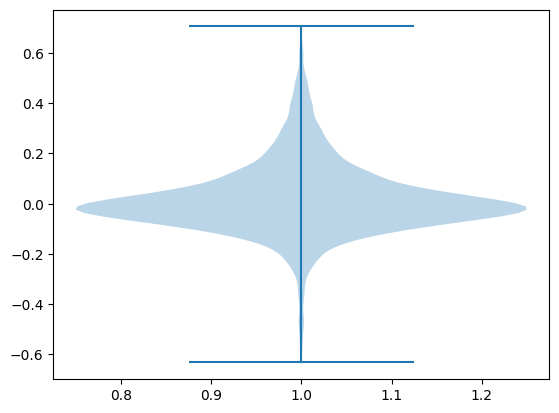

In [14]:
plt.violinplot(correlations)

In [15]:
max_corr = correlations.sort_values(ascending = False)[:100]

In [16]:
top100_genes_corr = X_train_data[max_corr.index].corr()

<Axes: >

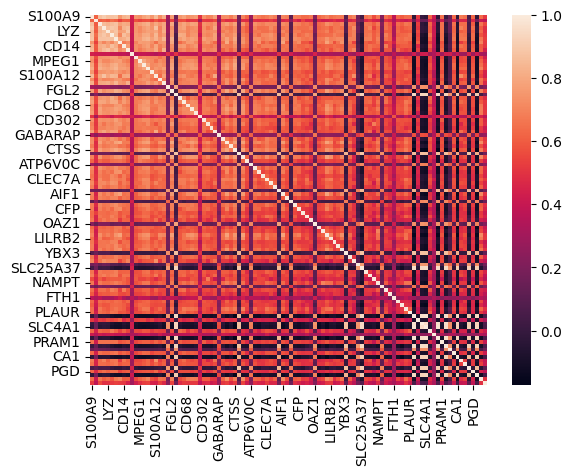

In [17]:
import seaborn as sns
sns.heatmap(top100_genes_corr)

From the heatmap alone, it's clear that there are varying levels of interaction or correlation between the different genes, with some showing strong positive and others with weaker or no relationship.

Additionally, clustering might have been performed as indicated by the ordering of the genes, grouping those with similar expression patterns together, which is a common practice to identify groups of genes that may be co-regulated or functionally related.

# **2. ElasticNet**

(a) ElasticNet is a linear regression model that combines both L1 and L2 regularization. It's designed to blend the properties of both Ridge Regression (L2 regularization) and Lasso (L1 regularization). The goal of ElasticNet, like other regularized regression models, is to prevent overfitting and improve the model's generalization by introducing a regularization penalty to the loss function.

Parameters Estimated:

Coefficients (β): These are the weights assigned to the input features.
Intercept (α): This is the bias term, independent of the input features.

Hyperparameters:

α: The constant that multiplies the penalty terms. A higher α means a stronger penalty, leading to simpler models (potentially underfitting).
ρ (also known as l1_ratio in some implementations): The mixing parameter between L1 and L2 regularization. It ranges from 0 to 1.
When
ρ=1, ElasticNet becomes Lasso Regression.
When
ρ=0, ElasticNet becomes Ridge Regression.

# **(b)**

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the model
model = ElasticNet()

param_grid = {
    'alpha': [0.01, 0.1, 1],
    'l1_ratio': [0, 0.5, 1]   # 0 for Ridge, 1 for Lasso, 0.5 for balanced ElasticNet
}

In [20]:
# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score = True)

# Fit the model
grid_search.fit(X_train_data, y_train_data)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+01, tolerance: 5.623e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+01, tolerance: 5.427e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Best parameters: {'alpha': 0.01, 'l1_ratio': 0.5}
Best score: -0.1377356948541105


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.049e+01, tolerance: 6.973e-01
  model = cd_fast.enet_coordinate_descent(


**Computational Efficiency:** More folds require more computational time as the model has to be trained and validated multiple times. If computational resources are limited, reducing the number of folds can make the cross-validation process more manageable.

**Training Data Utilization:** In 5-fold cross-validation, each fold uses 80% of the data for training, which is generally sufficient to train a robust model, while also leaving out 20% for validation. This is a good balance for both training and validation phases.

**Practical Experience:** Empirical evidence suggests that 5-fold cross-validation tends to yield test error estimates that suffer neither from excessively high bias nor from very high variance. It is a commonly used number of folds that many practitioners find to be a good starting point.

# **(c)**

In [29]:
mean_train_error = -grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
mean_validation_error = -grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
print(f"mean train error: {mean_train_error}")
print(f"mean validation error: {mean_validation_error}")

mean train error: 0.09617711339355231
mean validation error: 0.1377356948541105


# **3. Random forest**

# **(a)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_depth': [2, 3, 5],  # Maximum depth of the tree
    'min_samples_split': [10, 15, 20]  # Minimum number of samples required to split an internal node
}

# Define the GridSearchCV for the Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)

# Fit the model using the same training data as for ElasticNet
grid_search_rf.fit(X_train_data, np.array(y_train_data).flatten())

# Get the best parameters and errors
best_params_rf = grid_search_rf.best_params_
mean_train_error_rf = -grid_search_rf.cv_results_['mean_train_score'][grid_search_rf.best_index_]
mean_validation_error_rf = -grid_search_rf.cv_results_['mean_test_score'][grid_search_rf.best_index_]

# **(b)**

In [31]:
# Provide a tabular summary of the cross-validation results of the methods in both models
# under consideration. (This comparison is why we make you use the same divisions.)
# Specify which model seems to be the best (justify your choice). Include a basic reference
# model for the comparison, which assigns the arithmetic mean of the dependent variable
# to any independent variable values. (3p.)

comparison_df = pd.DataFrame({
    'Model': ['ElasticNet', 'RandomForest', 'Baseline'],
    'Mean Train Error': [mean_train_error, mean_train_error_rf, None],
    'Mean Validation Error': [mean_validation_error, mean_validation_error_rf, None]
})

baseline_error = np.mean((y_train_data['CD36_Y'] - y_train_data['CD36_Y'].mean()) ** 2)

# Add baseline error to the comparison dataframe
comparison_df.loc[comparison_df['Model'] == 'Baseline', 'Mean Train Error'] = baseline_error
comparison_df.loc[comparison_df['Model'] == 'Baseline', 'Mean Validation Error'] = baseline_error

print(comparison_df)

          Model  Mean Train Error  Mean Validation Error
0    ElasticNet          0.096177               0.137736
1  RandomForest          0.228993               0.242476
2      Baseline          1.837776               1.837776


# **Specify which model seems to be the best (justify your choice).**

# **4. Prediction on a test set**

In [ ]:
# Let's train lgbm using cross-validation
import lightgbm as lgb
from sklearn.model_selection import KFold

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 3, 5],
    'num_leaves': [10, 20, 30]
}

# Define the LGBM model
model = lgb.LGBMRegressor(random_state=42)

# Define the KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the GridSearchCV for the LGBM
grid_search_lgbm = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_root_mean_squared_error',
                                return_train_score=True, n_jobs=-1)

# Let's use only the most correlated genes
most_correlated_genes = correlations.sort_values(ascending=False).index[:100]
X_most_correlated_train_data = X_train_data[most_correlated_genes]
grid_search_lgbm.fit(X_train_data, np.array(y_train_data).flatten())

# Get the best parameters and errors
best_params_lgbm = grid_search_lgbm.best_params_
mean_train_error_lgbm = -grid_search_lgbm.cv_results_['mean_train_score'][grid_search_lgbm.best_index_]
mean_validation_error_lgbm = -grid_search_lgbm.cv_results_['mean_test_score'][grid_search_lgbm.best_index_]

In [ ]:
# Get the best parameters and errors
best_params_lgbm = grid_search_lgbm.best_params_
mean_train_error_lgbm = -grid_search_lgbm.cv_results_['mean_train_score'][grid_search_lgbm.best_index_]
mean_validation_error_lgbm = -grid_search_lgbm.cv_results_['mean_test_score'][grid_search_lgbm.best_index_]
print(f"Mean train error for LGBM: {mean_train_error_lgbm}")
print(f"Mean validation error for LGBM: {mean_validation_error_lgbm}")

In [ ]:
best_model = grid_search_lgbm.best_estimator_

# Get the feature importances
feature_importances = best_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_train_data.columns, 'Importance': feature_importances})
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()